# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Import API key
from api_keys import weather_api_key

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

#create lists that we will use to hold the response info
temp=[]
humidity=[]
clouds=[]
wind=[]
cityname=[]
city_id=[]
lat_api=[]
lon_api=[]

#iterate for multiple cities
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    try:
        weather_json=requests.get(query_url).json()
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        cityname.append(weather_json['name'])
        city_id.append(weather_json['id'])
        lat_api.append(weather_json["coord"]["lat"])
        lon_api.append(weather_json["coord"]["lon"])
    except:
        print(f'no data for {city}')
    
        
print(cityname,city_id,temp,humidity,clouds,wind)

no data for mys shmidta
no data for nizhneyansk
no data for tasbuget
no data for taolanaro
no data for amderma
no data for belushya guba
no data for lephepe
no data for illoqqortoormiut
no data for karauzyak
no data for sentyabrskiy
no data for grand river south east
no data for cockburn harbour
no data for alotau
no data for barentsburg
no data for attawapiskat
no data for palabuhanratu
no data for artyk
no data for samusu
no data for vaitupu
no data for meyungs
no data for saleaula
no data for gorno-chuyskiy
no data for rungata
no data for solovetskiy
no data for mullaitivu
no data for churumuco
no data for dzhusaly
no data for bednodemyanovsk
no data for paradwip
no data for lemesos
no data for nguiu
no data for tidore
no data for kamenskoye
no data for skanevik
no data for tarudant
no data for umm jarr
no data for ruatoria
no data for mocambique
no data for tabiauea
no data for halalo
no data for louisbourg
no data for rolim de moura
no data for litoral del san juan
no data for kho

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_weather_dict={"id":city_id,
              "city":cityname,
                   "lat":lat_api,
                   "lon":lon_api,
             "temp (F)":temp,
             "humidity (%)":humidity,
             "cloudiness (%)":clouds,
             "wind speed (mph)":wind}

In [13]:
city_weather_df=pd.DataFrame(city_weather_dict)
city_weather_df.shape

(560, 8)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
clean_city_data=city_weather_df.drop(city_weather_df[city_weather_df["humidity (%)"]>100].index, inplace= False)
clean_city_data.shape

(560, 8)

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

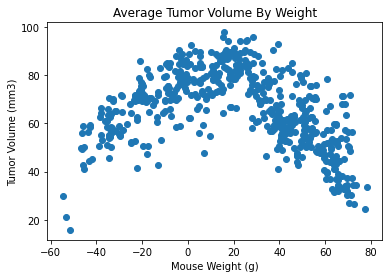

In [15]:
plt.title('Temperature by Latitude - 6/1/2021')
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.scatter(clean_city_data["lat"],clean_city_data["temp (F)"])
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

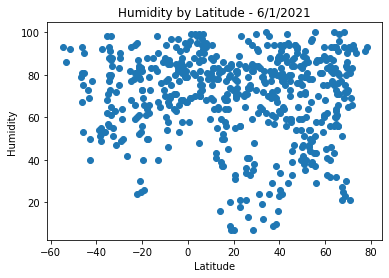

In [16]:
plt.title('Humidity by Latitude - 6/1/2021')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.scatter(clean_city_data["lat"],clean_city_data["humidity (%)"])
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

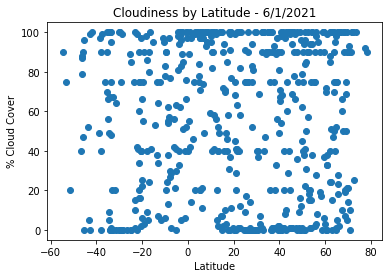

In [17]:
plt.title('Cloudiness by Latitude - 6/1/2021')
plt.ylabel("% Cloud Cover")
plt.xlabel("Latitude")
plt.scatter(clean_city_data["lat"],clean_city_data["cloudiness (%)"])
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

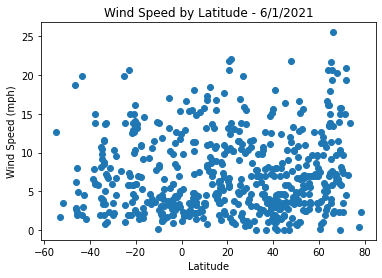

In [18]:
plt.title('Wind Speed by Latitude - 6/1/2021')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.scatter(clean_city_data["lat"],clean_city_data["wind speed (mph)"])
plt.show

## Linear Regression

In [29]:
clean_city_data_north=clean_city_data[clean_city_data["lat"]>=0]
clean_city_data_south=clean_city_data[clean_city_data["lat"]<0]
x_values_north_lat = clean_city_data_north["lat"]
y_values_north_temp = clean_city_data_north["temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north_lat, y_values_north_temp)
regress_north_temp = x_value_north_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

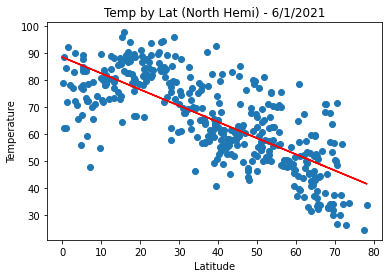

In [30]:
plt.title('Temp by Lat (North Hemi) - 6/1/2021')
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.scatter(clean_city_data_north["lat"],clean_city_data_north["temp (F)"])
plt.plot(x_values,regress_north_temp,"r-")
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

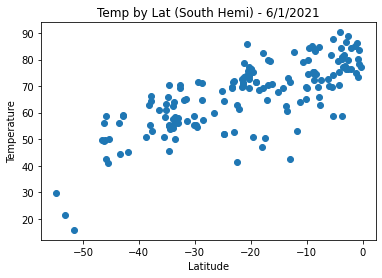

In [24]:
plt.title('Temp by Lat (South Hemi) - 6/1/2021')
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.scatter(clean_city_data_south["lat"],clean_city_data_south["temp (F)"])
plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression